# Results of analysis

Reading LiME_Binning output

In [15]:
#file = "../../../LiME_binning results/paired/all_250000_1+RC.fasta.a16.t25.txt"
#file = "../../../LiME_binning results/paired/all_250000_1+RC.fasta.a16.t20.txt"
#file = "../../../LiME_binning results/single/all_250000_2+RC.fasta.a16.t20.txt"
#file = "../../../LiME_binning results/single/all_250000_1+RC.fasta.a16.t25.txt"
#file = "../../../LiME_binning results/paired/all_250000_1+RC.fasta.a16.t40.txt"
file = "../../../LiME_binning results/paired/all_250000_1+RC.fasta.a22.t40.txt"

Paired = True

if Paired:
    threshold = 40
    
else:
    threshold = 20

In [16]:
f = open(file, "r")

In [17]:
l = []
for x in f:
    l.append(int(x))

f.close()
print("number of reads: ", len(l))

max_val = max(l)

s = []
for x in range(0, max_val+1):
    s.append(0)
    
print("number of clusters: ", len(s))

for i in range(0, len(l)):
    temp = l[i]
    s[temp] = s[temp] + 1


max_set_size = max(s)

max_set = s.index(max_set_size)
print("max set size: ", max_set_size)
print("max set index: ", max_set)

count=0;
for i in range(0, len(s)):
    if s[i]==1:
        count=count + 1

print("number of non grouped reads: ", count)

sorted_s = s

sorted_s.sort(reverse=True)

print("Sizes of ten largest sets:")
for i in range(0, 10):
    print(sorted_s[i])

number of reads:  3125000
number of clusters:  209815
max set size:  627607
max set index:  425
number of non grouped reads:  79037
Sizes of ten largest sets:
627607
62500
62500
62500
62500
62500
62500
62500
62500
62500


In [18]:
cluster_dict = {}

for cluster in l:
    
    if cluster in cluster_dict.keys():
        cluster_dict[cluster] = cluster_dict[cluster] + 1 
    
    else:
        cluster_dict[cluster] = 1

print("len cluster dict: ", len(cluster_dict))

sorted_tuples = sorted(cluster_dict.items(), key=lambda item: item[1], reverse = True)

sorted_dict = {k: v for k, v in sorted_tuples}

len cluster dict:  209815


In [19]:
k = 20 

top_k_cluster = []

i = 0
for cluster, cardinality in sorted_dict.items():
    
    if i <= k:
        top_k_cluster.append([cluster, cardinality])
    
    else:
        break
        
    i = i + 1
    
print(top_k_cluster)

[[425, 627607], [209805, 62500], [209806, 62500], [209807, 62500], [209808, 62500], [209809, 62500], [209810, 62500], [209811, 62500], [209812, 62500], [209813, 62500], [209814, 62500], [79235, 24314], [80471, 21788], [13731, 21477], [102420, 10245], [80496, 8844], [80467, 5808], [13733, 5460], [13728, 5396], [60266, 5387], [80470, 5215]]


['425', '209805', '209806', '209807', '209808', '209809', '209810', '209811', '209812', '209813', '209814', '79235', '80471', '13731', '102420', '80496', '80467', '13733', '13728', '60266']
[627607, 62500, 62500, 62500, 62500, 62500, 62500, 62500, 62500, 62500, 62500, 24314, 21788, 21477, 10245, 8844, 5808, 5460, 5396, 5387]


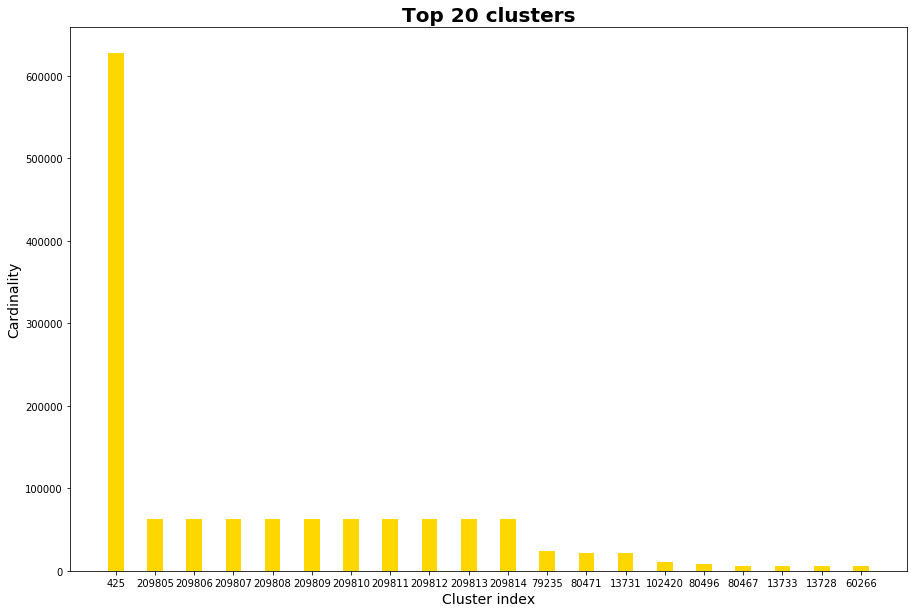

In [20]:
import matplotlib.pyplot as plt

top_k_cluster_index = []
top_k_cluster_cardinality = []

for i in range(0, k):
    top_k_cluster_index.append(str(top_k_cluster[i][0]))
    top_k_cluster_cardinality.append(top_k_cluster[i][1])

print(top_k_cluster_index)
print(top_k_cluster_cardinality)

plt.figure(figsize=(15,10))
width = 0.4

plt.bar(top_k_cluster_index, top_k_cluster_cardinality, width = width, color='gold', label='Top clusters')

plt.xlabel('Cluster index', fontsize = 14)
plt.ylabel('Cardinality',fontsize = 14)
plt.title('Top '+str(k)+' clusters', fontweight='bold', fontsize=20)

# save the figure
plt.savefig('Top_k_cluster.png', dpi=300, bbox_inches='tight')

plt.show()

In [21]:
def plotALot(cluster_to_show,threshold):

    x = []
    y = []

    for i in range(len(cluster_to_show)):
        x.append(str(cluster_to_show[i][0]))
        y.append(cluster_to_show[i][1])


    plt.figure(figsize=(15,10))
    width = 0.4
    plt.bar(x,y,width=width,color='lightblue',label='Total elements in the cluster')
    plt.xlabel('Cluster',fontsize=14)
    plt.ylabel('Number of reads',fontsize=14)
    plt.legend(loc='upper right')
    plt.title('Top clusters which cover '+str(threshold)+'% of the total',fontweight='bold',fontsize=20)

len of cluster_to_show list:  10
cluster_to_show list:
[[425, 627607], [209805, 62500], [209806, 62500], [209807, 62500], [209808, 62500], [209809, 62500], [209810, 62500], [209811, 62500], [209812, 62500], [209813, 62500]]


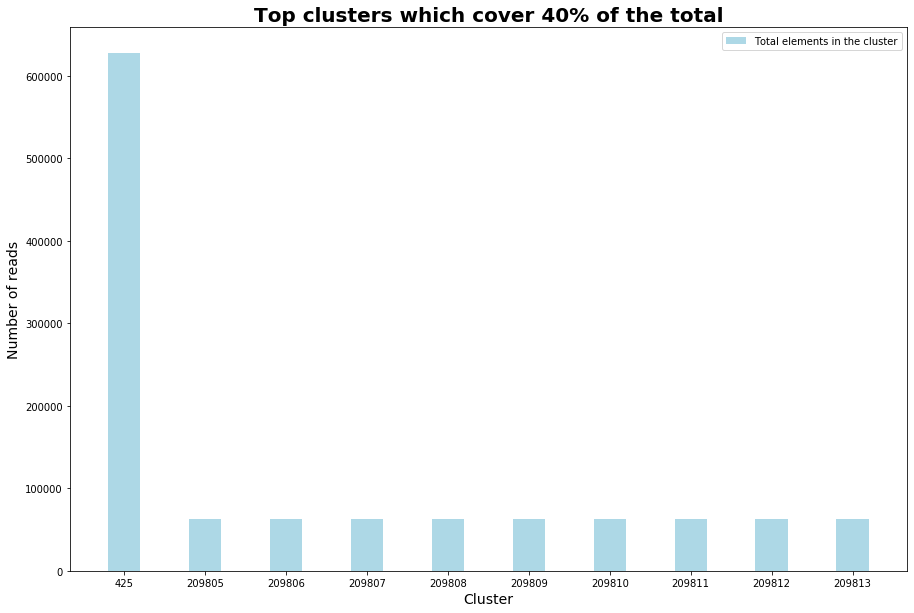

In [22]:
tot_reads = len(l) # number of read clustered
read = 0 # read counter 

cluster_to_show = [] # list of [cluster, cardinality] pairs 

for cluster, cardinality in sorted_dict.items():
    
    read = read + cardinality
    
    if read / tot_reads * 100 <= threshold:
        cluster_to_show.append([cluster, cardinality])
        
    else:
        break

print("len of cluster_to_show list: ", len(cluster_to_show))
print("cluster_to_show list:")
print(cluster_to_show)

plotALot(cluster_to_show, threshold)

#in this way I can show clusters which cover the "threshold" part of the entire reads.

In [23]:
import csv

with open('clustering.csv', 'w', newline='') as csvfile:
    fieldnames = ['cluster_index', 'cardinality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for cluster, cardinality in cluster_dict.items():
        writer.writerow({'cluster_index': cluster, 'cardinality': cardinality})

In [24]:
import pandas as pd
import numpy as np

In [25]:
single20 = pd.read_csv('single20clustering.csv')

single25 = pd.read_csv('single25clustering.csv')

paired20 = pd.read_csv('paired20clustering.csv')

paired25 = pd.read_csv('paired25clustering.csv')

paired40 = pd.read_csv('paired40clustering.csv')

paired2240 = pd.read_csv('paired2240clustering.csv')

Text(0, 0.5, 'cardinality')

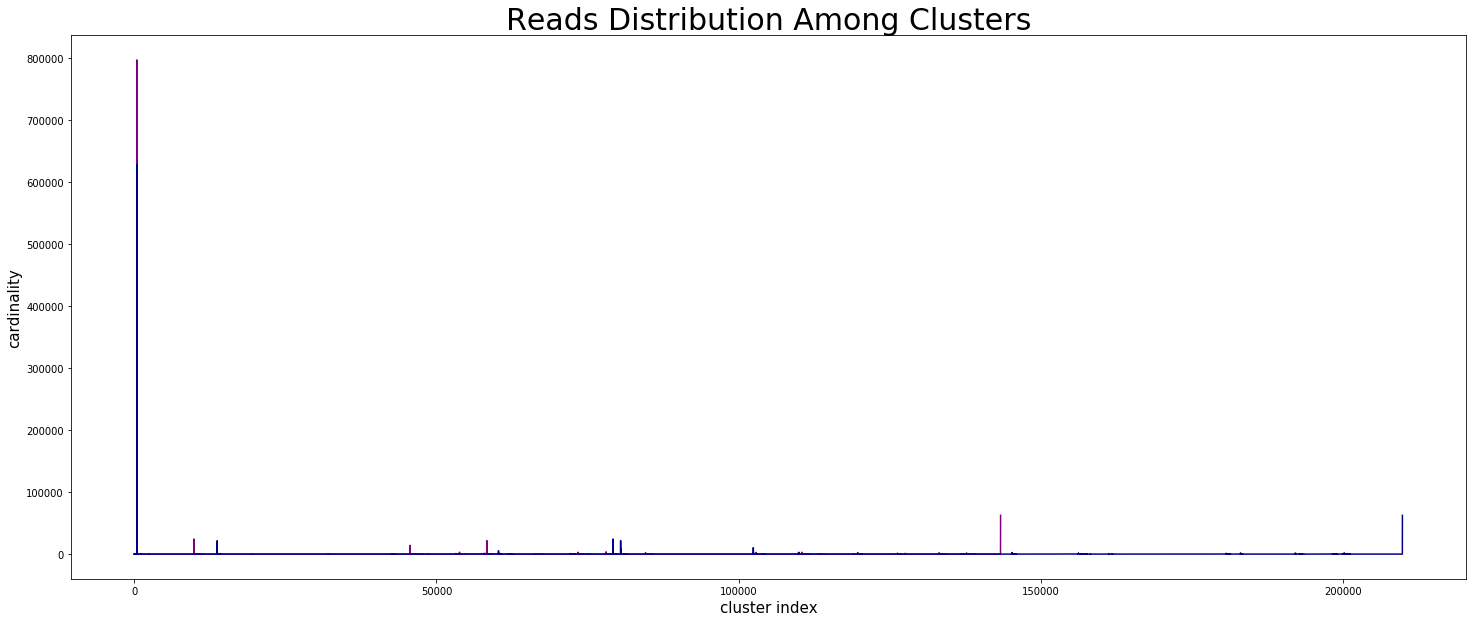

In [26]:
plt.figure(figsize=(25, 10))
#plt.plot(single20['cardinality'], color = 'red')
#plt.plot(single25['cardinality'], color = 'blue')
#plt.plot(paired20['cardinality'], color = 'green')
#plt.plot(paired25['cardinality'], color = 'yellow')
plt.plot(paired40['cardinality'], color = 'purple')
plt.plot(paired2240['cardinality'], color = 'darkblue')

plt.title("Reads Distribution Among Clusters", fontsize = 30)
plt.xlabel("cluster index", fontsize = 15)
plt.ylabel("cardinality", fontsize = 15)

Text(0, 0.5, 'cardinality')

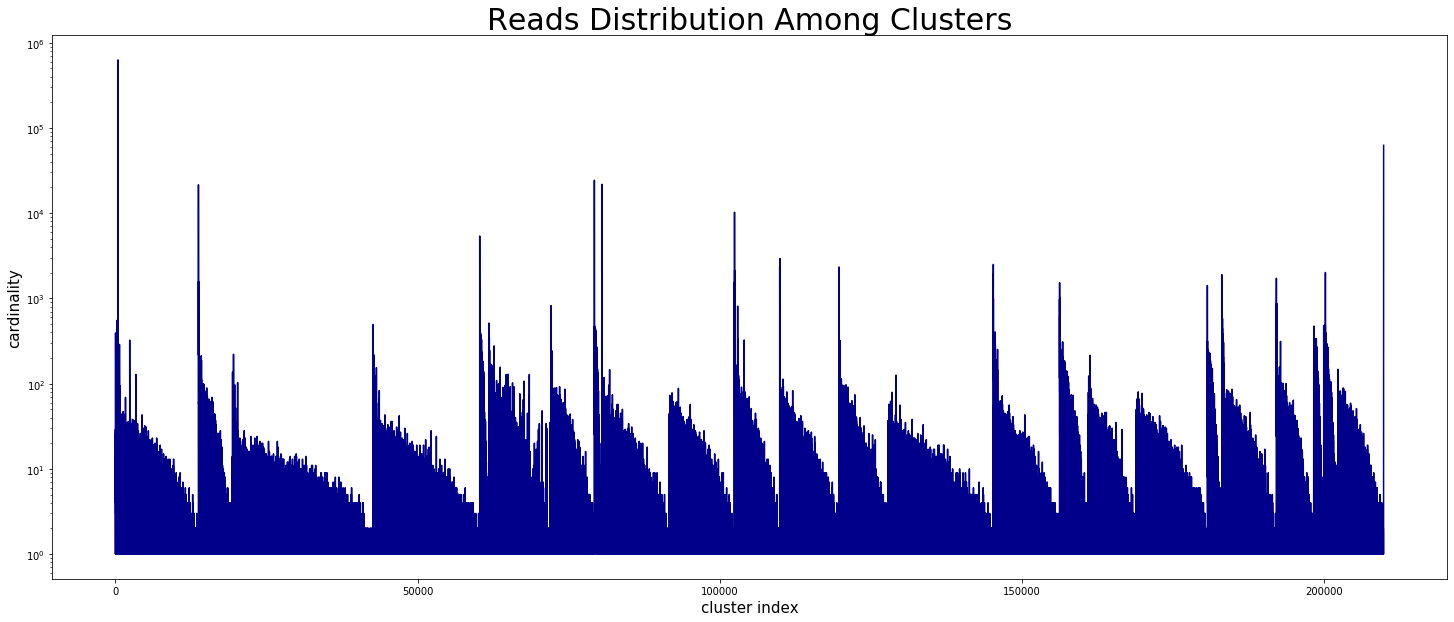

In [27]:
plt.figure(figsize=(25, 10))
#plt.plot(single20['cardinality'], color = 'red')
#plt.plot(single25['cardinality'], color = 'blue')
#plt.plot(paired20['cardinality'], color = 'green')
#plt.plot(paired25['cardinality'], color = 'yellow')
#plt.plot(paired40['cardinality'], color = 'purple')
plt.plot(paired2240['cardinality'], color = 'darkblue')

plt.yscale('log')
plt.title("Reads Distribution Among Clusters", fontsize = 30)
plt.xlabel("cluster index", fontsize = 15)
plt.ylabel("cardinality", fontsize = 15)

